In [121]:
import pandas as pd
import numpy as np
import datetime
import os

In [122]:
cars_data=pd.read_excel(r"C:\Users\PRASHANTH\OneDrive\Desktop\csv_files\Data_Train.xlsx")
print(cars_data)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [123]:
cars_data.columns=['Name','Location','Year','Kilometeres_Driven','Fuel_Type','Transmission','Owner_Type','Mileage',
               'Engine','Power','Seats','Price']
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [124]:
cars_data.shape

(6019, 12)

In [125]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6019 non-null   object 
 1   Location            6019 non-null   object 
 2   Year                6019 non-null   int64  
 3   Kilometeres_Driven  6019 non-null   int64  
 4   Fuel_Type           6019 non-null   object 
 5   Transmission        6019 non-null   object 
 6   Owner_Type          6019 non-null   object 
 7   Mileage             6017 non-null   object 
 8   Engine              5983 non-null   object 
 9   Power               5983 non-null   object 
 10  Seats               5977 non-null   float64
 11  Price               6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [126]:
cars_data.describe()

,Year,Kilometeres_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [127]:
cars_data.dtypes

Name                   object
Location               object
Year                    int64
Kilometeres_Driven      int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage                object
Engine                 object
Power                  object
Seats                 float64
Price                 float64
dtype: object

## Data Pre-Processing¶

In [128]:
cars_data.isna().sum()

Name                   0
Location               0
Year                   0
Kilometeres_Driven     0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                 36
Seats                 42
Price                  0
dtype: int64

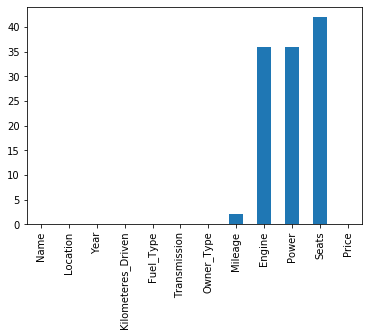

In [129]:
pd.isnull(cars_data).sum().plot(kind="bar")

In [130]:
cars_data["Engine"]=cars_data["Engine"].str.replace("CC"," ")
cars_data["Power"]=cars_data["Power"].str.replace("bhp"," ")
cars_data["Mileage"]=cars_data["Mileage"].str.replace("km/kg"," ")
cars_data["Mileage"]=cars_data["Mileage"].str.replace("kmpl"," ")
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [131]:
cars_data["Mileage"]=cars_data["Mileage"].apply(pd.to_numeric,errors="coerce")
cars_data["Engine"]=cars_data["Engine"].apply(pd.to_numeric,errors="coerce")
cars_data["Power"]=cars_data["Power"].apply(pd.to_numeric,errors="coerce")
cars_data.dtypes

Name                   object
Location               object
Year                    int64
Kilometeres_Driven      int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

## DATA VISUALIZATION¶

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import math
from numpy import mean
from numpy import std

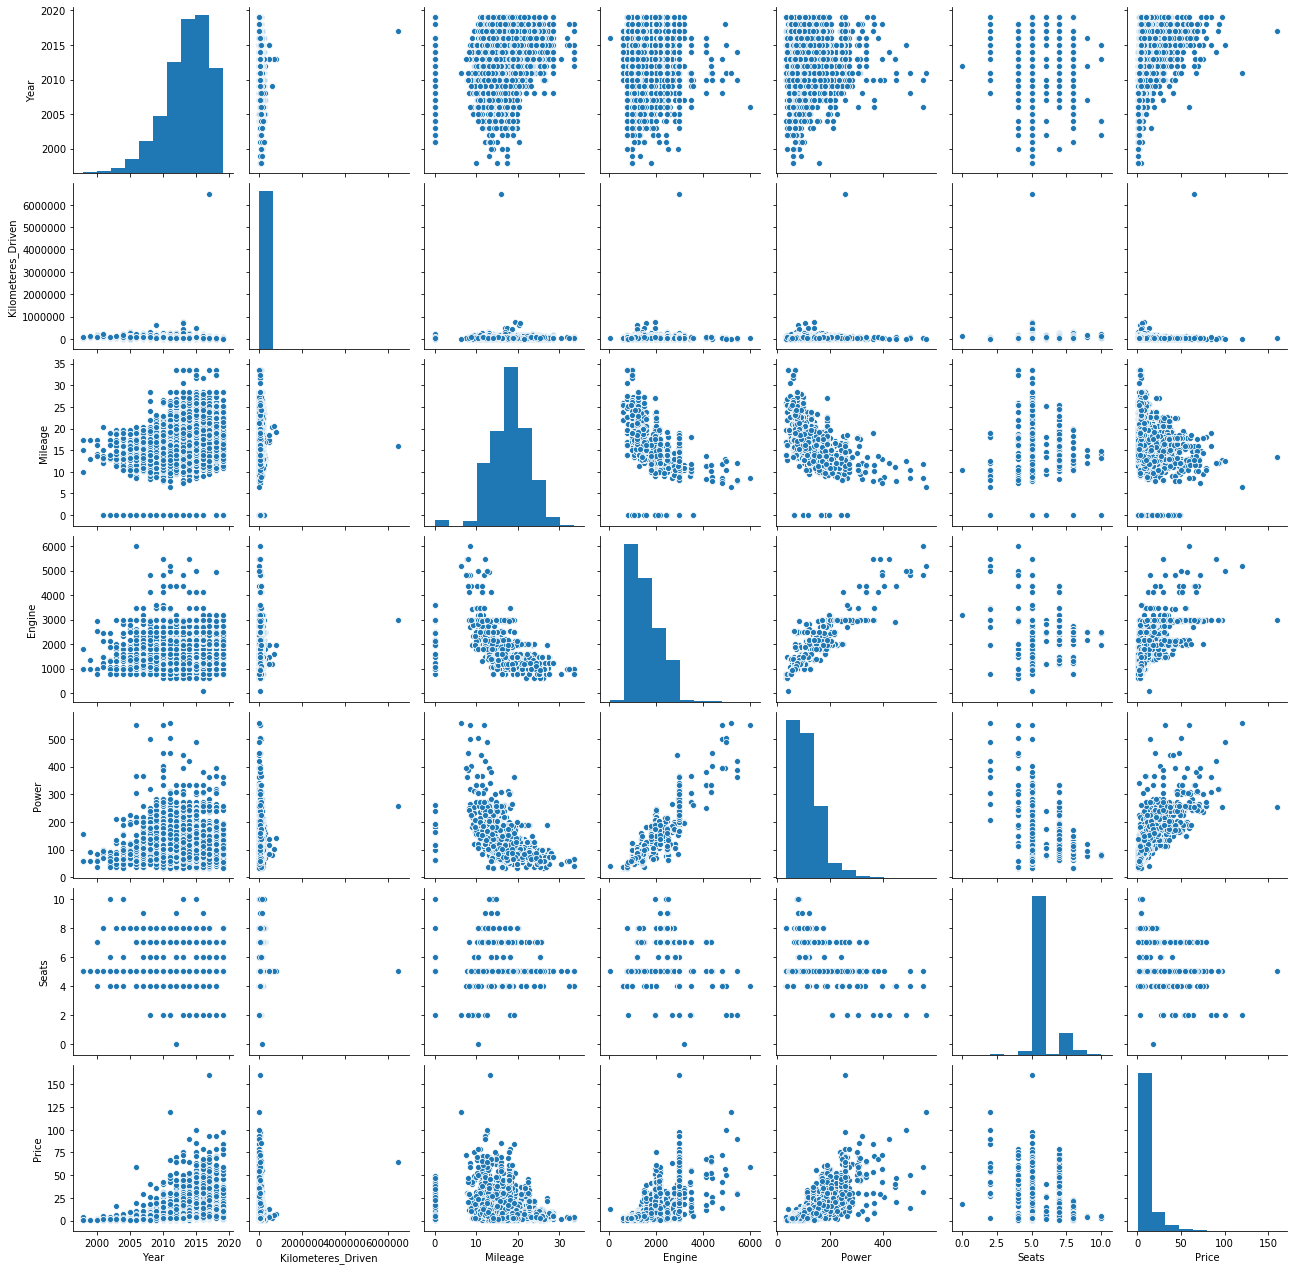

In [133]:
sns.pairplot(cars_data)

In [134]:
cars_data.Name.describe()

count                       6019
unique                      1876
top       Mahindra XUV500 W8 2WD
freq                          49
Name: Name, dtype: object

In [135]:
cars_data.Name.value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Tata Tigor 1.05 Revotorq XT             1
Maruti Swift LDI BSIV                   1
Volkswagen Ameo 1.5 TDI Comfortline     1
Tata Safari Storme 2012-2015 EX         1
Maruti Wagon R LX DUO BSIII             1
Name: Name, Length: 1876, dtype: int64

In [136]:
for i in range(cars_data.shape[0]):
    cars_data.at[i, 'Company'] = cars_data['Name'][i].split()[0]

<Figure size 360x360 with 0 Axes>

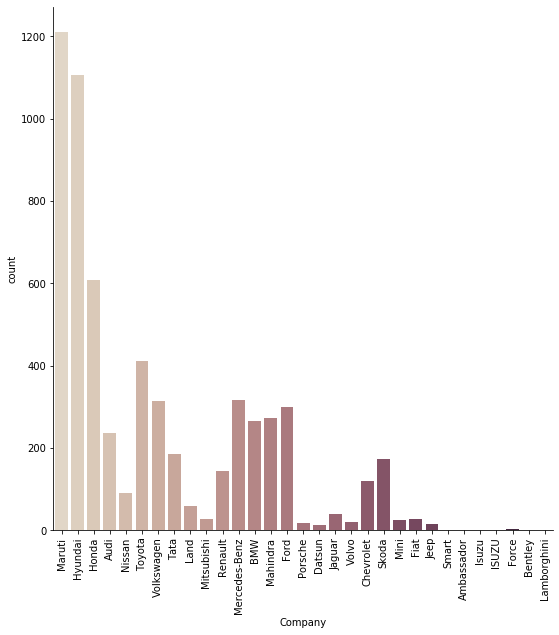

In [137]:
var = "Company"
plt.figure(figsize=(5,5))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=1, data=cars_data);
plt.xticks(rotation=90);

In [138]:
cars_data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<Figure size 360x360 with 0 Axes>

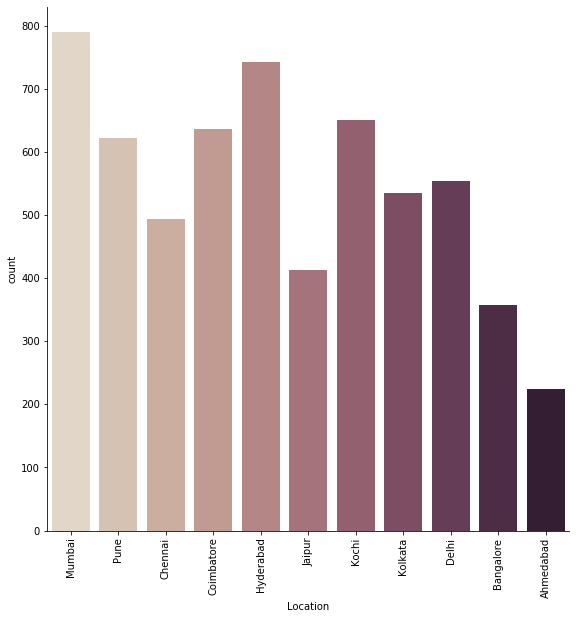

In [139]:
var = "Location"
plt.figure(figsize=(5,5))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=1, data=cars_data);
plt.xticks(rotation=90);

Mumbai has most Number of cars to be sold followed by Hyderbad

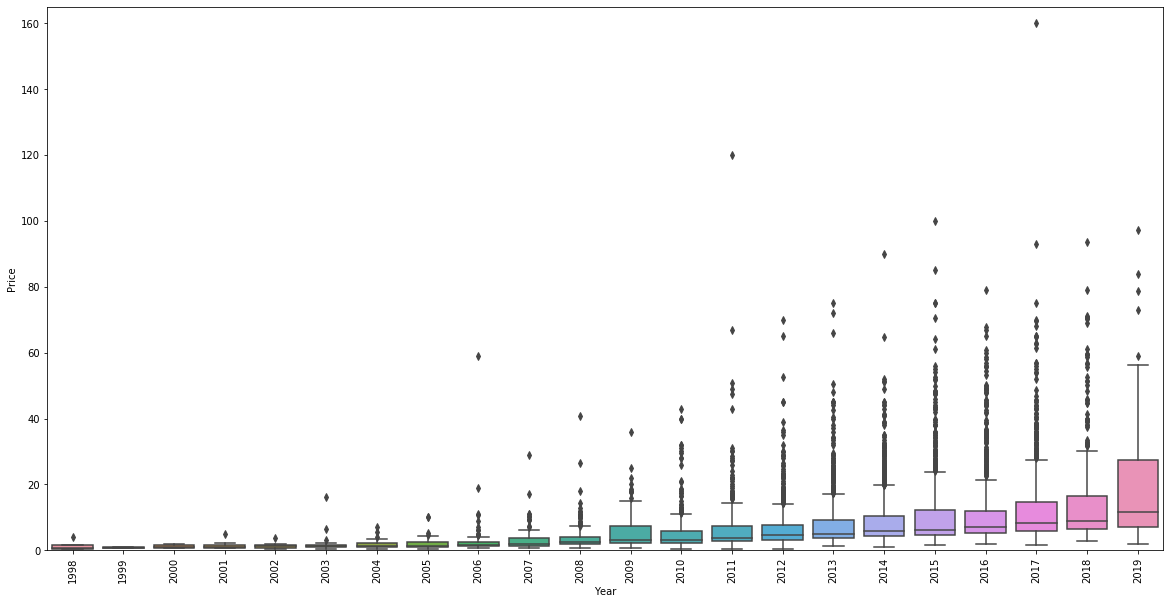

In [140]:
var = 'Year'
data = pd.concat([cars_data['Price'], cars_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly,price of new cars are high compared to old ones

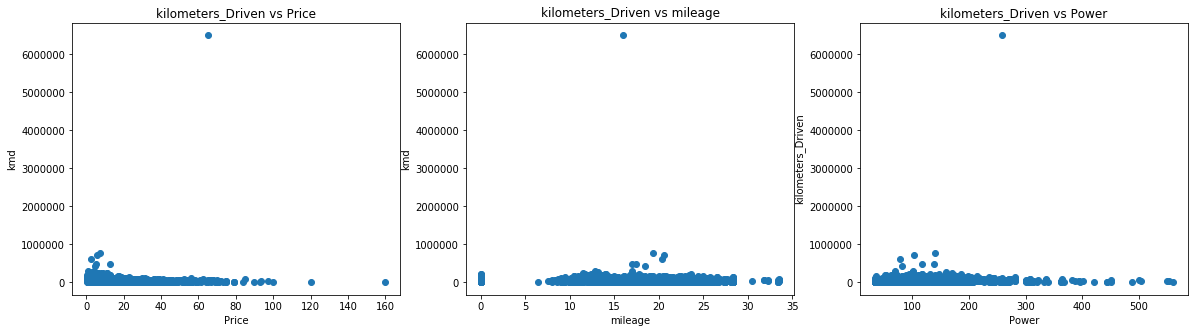

In [141]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.scatter(cars_data['Price'],cars_data['Kilometeres_Driven'])
plt.title('kilometers_Driven vs Price')
plt.ylabel('kmd')
plt.xlabel('Price')

plt.subplot(1,3,2)
plt.scatter(cars_data['Mileage'],cars_data['Kilometeres_Driven'])
plt.title('kilometers_Driven vs mileage')
plt.ylabel('kmd')
plt.xlabel('mileage')

plt.subplot(1,3,3)
plt.scatter(cars_data['Power'],cars_data['Kilometeres_Driven'])
plt.title('kilometers_Driven vs Power')
plt.ylabel('kilometers_Driven')
plt.xlabel('Power')
plt.show()

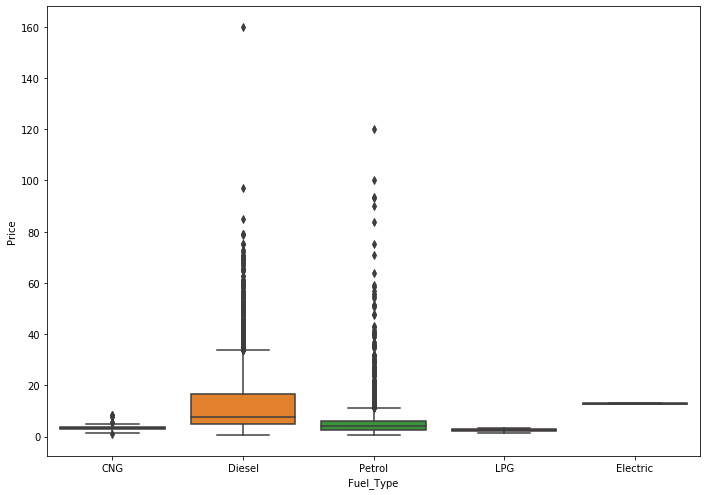

In [142]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = var, y ='Price', data = cars_data)

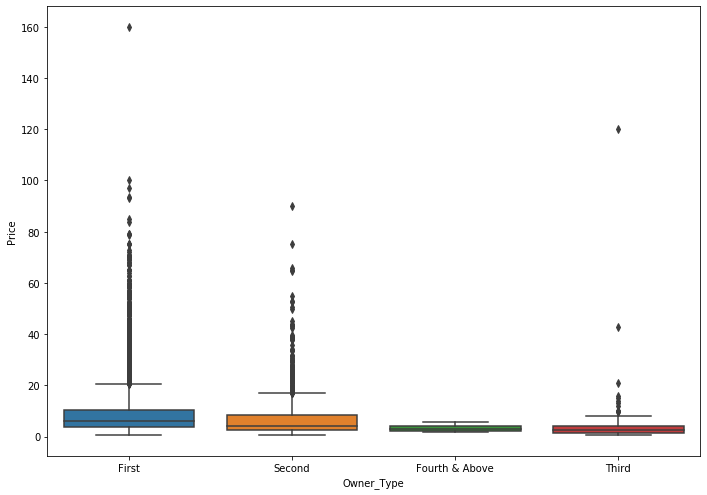

In [143]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = var, y ='Price', data = cars_data) 

<function matplotlib.pyplot.show(*args, **kw)>

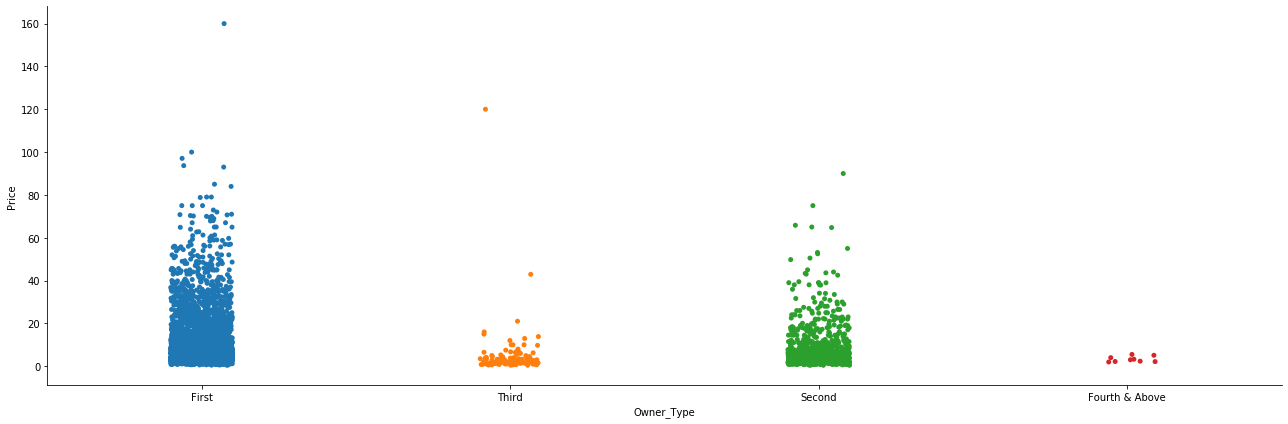

In [144]:
sns.catplot(y='Price',x=var,data= cars_data.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show

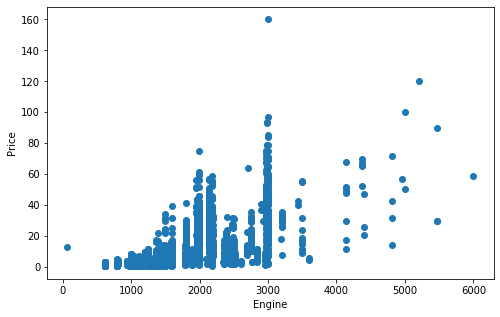

In [145]:
plt.rcParams["figure.figsize"] = (8,5)
fig,ax =plt.subplots()
ax.scatter(cars_data['Engine'],cars_data['Price'])
ax.set_xlabel("Engine")
ax.set_ylabel("Price")
plt.show()

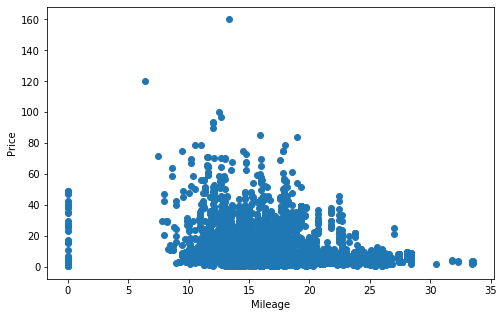

In [146]:
fig,ax =plt.subplots()
ax.scatter(cars_data['Mileage'],cars_data['Price'])
ax.set_xlabel("Mileage")
ax.set_ylabel("Price")
plt.show()

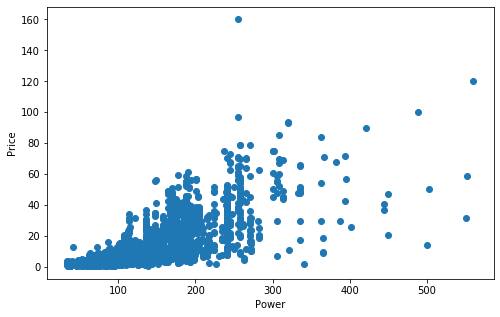

In [147]:
fig,ax =plt.subplots()
ax.scatter(cars_data['Power'],cars_data['Price'])
ax.set_xlabel("Power")
ax.set_ylabel("Price")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

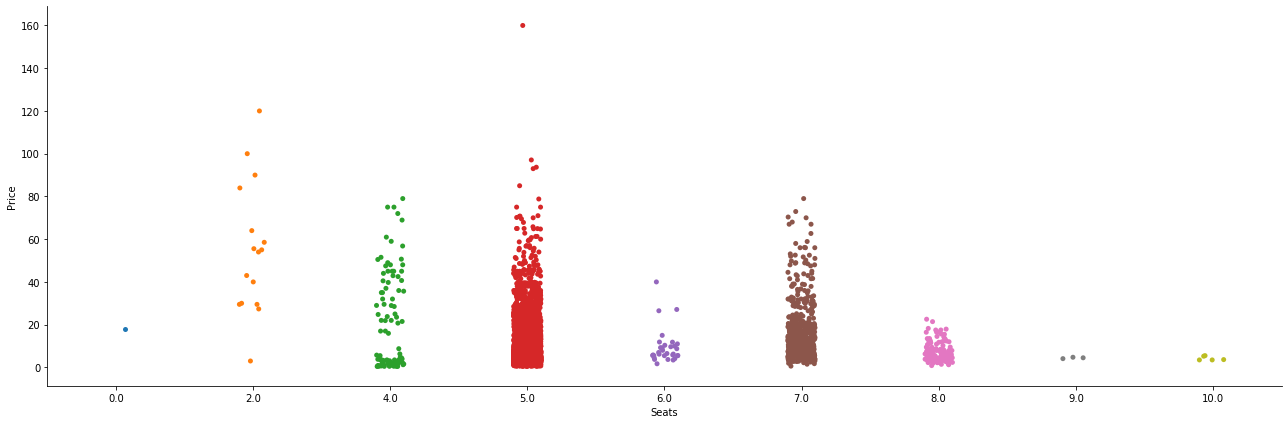

In [148]:
var='Seats'
sns.catplot(y='Price',x=var,data= cars_data.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show

## DATA CLEANING

In [149]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [150]:
le=LabelEncoder()
cars_data["Location"]=le.fit_transform(cars_data["Location"])
cars_data.Location.unique()

array([ 9, 10,  2,  3,  5,  6,  7,  8,  4,  1,  0])

In [151]:
le=LabelEncoder()
cars_data["Fuel_Type"]=le.fit_transform(cars_data["Fuel_Type"])
cars_data.Fuel_Type.unique()

array([0, 1, 4, 3, 2])

In [152]:
le=LabelEncoder()
cars_data["Transmission"]=le.fit_transform(cars_data["Transmission"])
cars_data.Transmission.unique()

array([1, 0])

In [153]:
le=LabelEncoder()
cars_data["Owner_Type"]=le.fit_transform(cars_data["Owner_Type"])
cars_data.Owner_Type.unique()

array([0, 2, 1, 3])

In [154]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,Audi


In [155]:
var='Location'
Location = cars_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location
0,9
1,10
2,2
3,2
4,3


In [156]:
var='Fuel_Type'
Fuel_t = cars_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type
0,0
1,1
2,4
3,1
4,1


In [157]:
var='Transmission'
Transmission = cars_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission
0,1
1,1
2,1
3,1
4,0


In [158]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,Audi


In [159]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6019 non-null   object 
 1   Location            6019 non-null   int32  
 2   Year                6019 non-null   int64  
 3   Kilometeres_Driven  6019 non-null   int64  
 4   Fuel_Type           6019 non-null   int32  
 5   Transmission        6019 non-null   int32  
 6   Owner_Type          6019 non-null   int32  
 7   Mileage             6017 non-null   float64
 8   Engine              5983 non-null   float64
 9   Power               5876 non-null   float64
 10  Seats               5977 non-null   float64
 11  Price               6019 non-null   float64
 12  Company             6019 non-null   object 
dtypes: float64(5), int32(4), int64(2), object(2)
memory usage: 517.4+ KB


In [160]:
cars_data=cars_data[cars_data.Kilometeres_Driven<6499999].copy()
brand_name=[]
model_name=[]
version=[]
for i,j in cars_data.iterrows():
    brand_name.append(j['Name'].split()[0].lower())
    model_name.append("".join(j['Name'].split()[1:3]).lower())
    version.append("".join(j['Name'].split()[3:]).lower())
cars_data['Brand']=brand_name
cars_data['Model']=model_name
cars_data['Version']=version
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Brand,Model,Version
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,Maruti,maruti,wagonr,lxicng
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,Hyundai,hyundai,creta1.6,crdisxoption
2,Honda Jazz V,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,Honda,honda,jazzv,
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,Maruti,maruti,ertigavdi,
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,Audi,audi,a4new,2.0tdimultitronic


## DATA VISUALIZATION¶

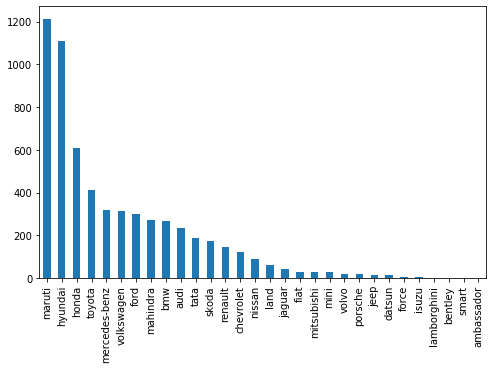

In [161]:
cars_data.Brand.value_counts().plot(kind='bar')

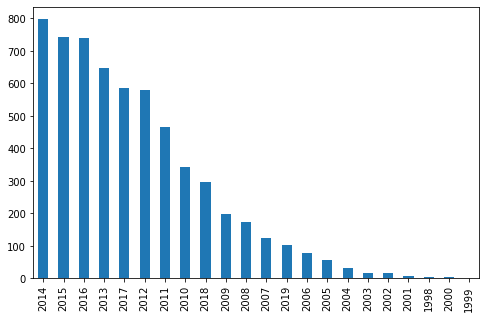

In [162]:
cars_data.Year.value_counts().plot(kind='bar')

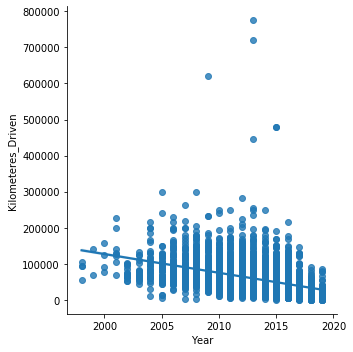

In [163]:
sns.lmplot('Year', 'Kilometeres_Driven'  , data=cars_data ,order=1)

## OUTLIER DETECTION

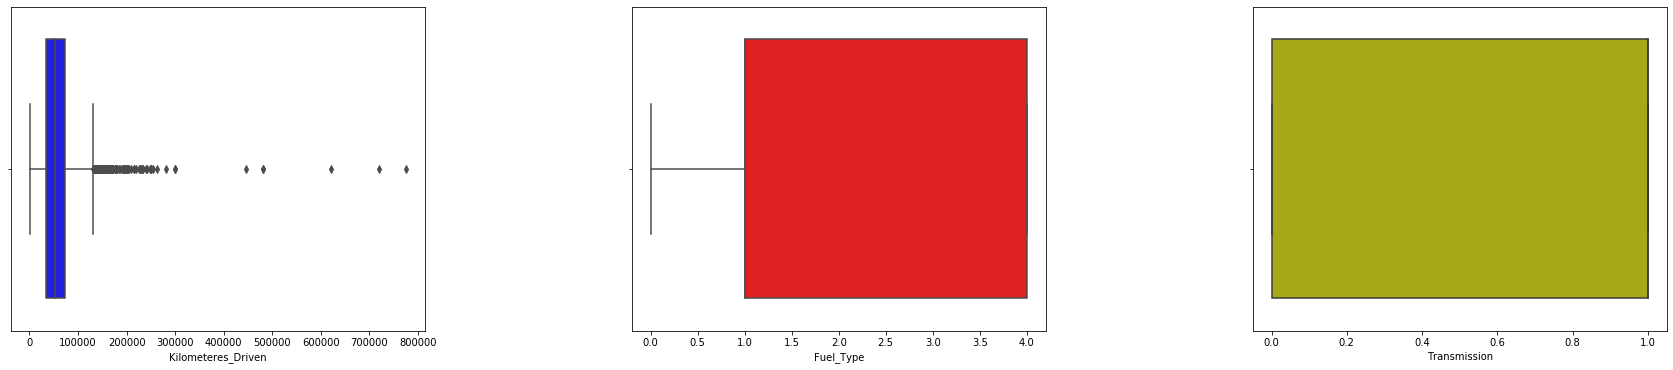

In [164]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.boxplot("Kilometeres_Driven",data=cars_data,color="b")
plt.subplot(132)
sns.boxplot("Fuel_Type",data=cars_data,color="r")
plt.subplot(133)
sns.boxplot("Transmission",data=cars_data,color="y")

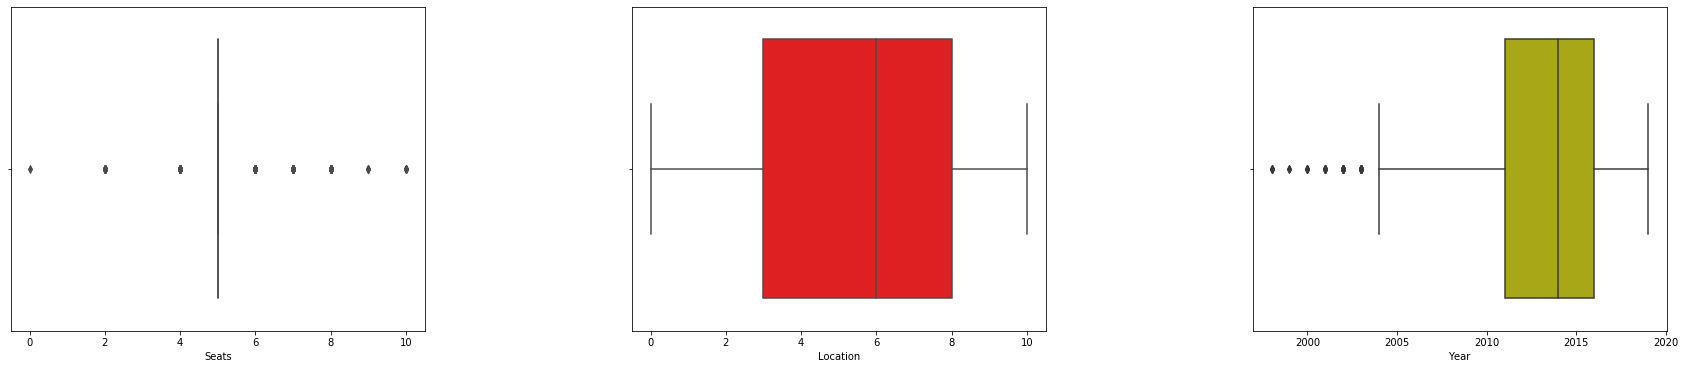

In [165]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.boxplot("Seats",data=cars_data,color="b")
plt.subplot(132)
sns.boxplot("Location",data=cars_data,color="r")
plt.subplot(133)
sns.boxplot("Year",data=cars_data,color="y")

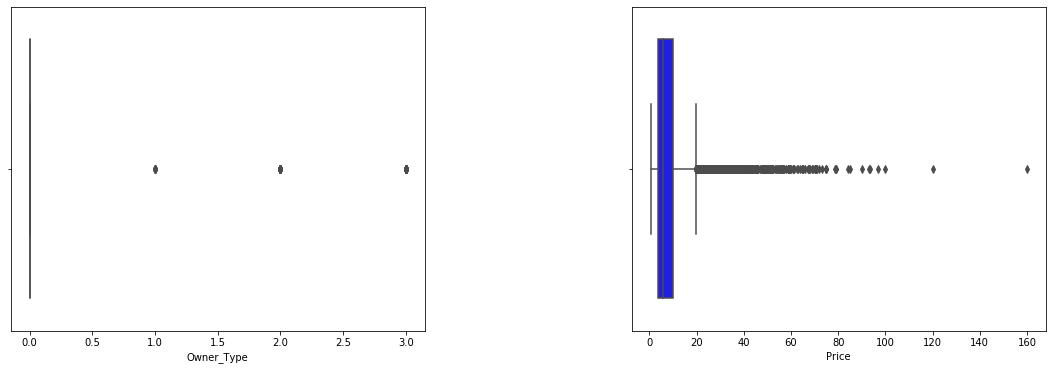

In [166]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.boxplot("Owner_Type",data=cars_data,color="b")
plt.subplot(132)
sns.boxplot("Price",data=cars_data,color="b")

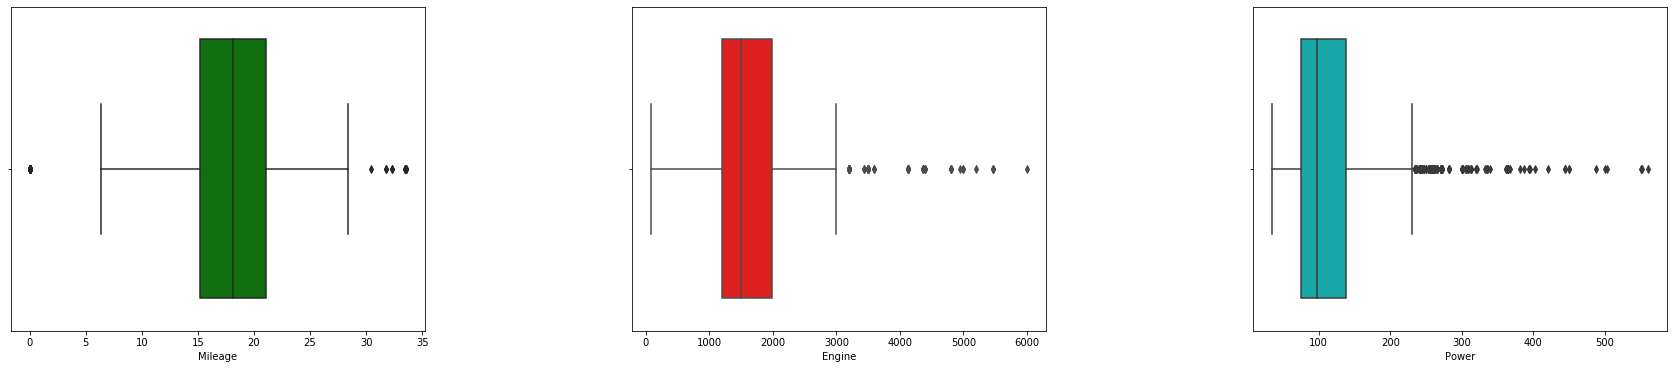

In [167]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.boxplot("Mileage",data=cars_data,color="g")
plt.subplot(132)
sns.boxplot("Engine",data=cars_data,color="r")
plt.subplot(133)
sns.boxplot("Power",data=cars_data,color="c")

In [168]:
print(cars_data.Seats.skew())
cars_data.Seats.describe()

1.835527088469499


count    5976.000000
mean        5.278782
std         0.808899
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [169]:
print(cars_data.Year.skew())
cars_data.Year.describe()

-0.8456678164346538


count    6018.000000
mean     2013.357594
std         3.269677
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [170]:
print(cars_data.Kilometeres_Driven.skew())
cars_data.Kilometeres_Driven.describe()

4.204752367311638


count      6018.000000
mean      57668.047690
std       37878.783175
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      775000.000000
Name: Kilometeres_Driven, dtype: float64

In [171]:
print(cars_data.Price.skew())
cars_data.Price.describe()

3.337576076530038


count    6018.000000
mean        9.470243
std        11.165926
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [172]:
print(cars_data.Owner_Type.skew())
cars_data.Owner_Type.describe()

1.784229030575053


count    6018.000000
mean        0.379528
std         0.818512
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Owner_Type, dtype: float64

In [173]:
print(cars_data.Mileage.skew())
cars_data.Mileage.describe()

-0.43194844433287005


count    6016.000000
mean       18.135321
std         4.582585
min         0.000000
25%        15.170000
50%        18.155000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [174]:
print(cars_data.Engine.skew())
cars_data.Engine.describe()

1.4223695650265555


count    5982.000000
mean     1621.047141
std       601.143848
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

In [175]:
print(cars_data.Power.skew())
cars_data.Power.describe()

1.9179206431665523


count    5875.000000
mean      113.228412
std        53.846427
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

## Filling Null Values With Meadian

In [176]:
cars_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometeres_Driven      0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
Price                   0
Company                 0
Brand                   0
Model                   0
Version                 0
dtype: int64

In [177]:
x1=math.floor(cars_data["Seats"].median())
x=math.floor(cars_data["Mileage"].median())
y=math.floor(cars_data["Engine"].median())
z=math.floor(cars_data["Power"].median())
cars_data["Seats"].fillna(x1,inplace=True)
cars_data["Mileage"].fillna(x,inplace=True)
cars_data["Engine"].fillna(y,inplace=True)
cars_data["Power"].fillna(z,inplace=True)

In [178]:
cars_data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometeres_Driven    0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
Company               0
Brand                 0
Model                 0
Version               0
dtype: int64

## Data_Analysis

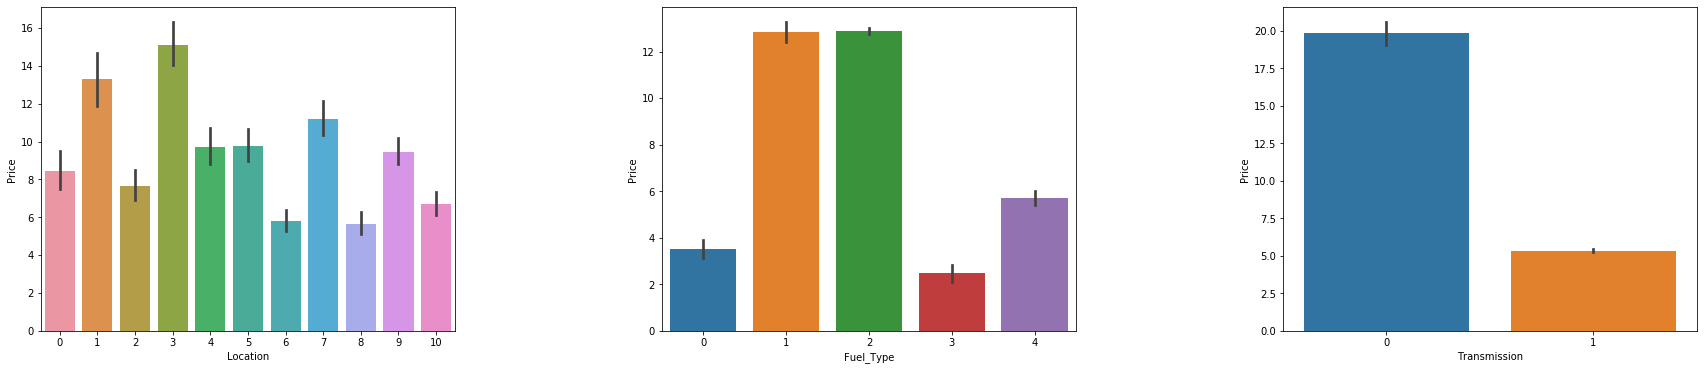

In [179]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.barplot(x="Location",y="Price",data=cars_data)
plt.subplot(132)
sns.barplot(x="Fuel_Type",y="Price",data=cars_data)
plt.subplot(133)
sns.barplot(x="Transmission",y="Price",data=cars_data)

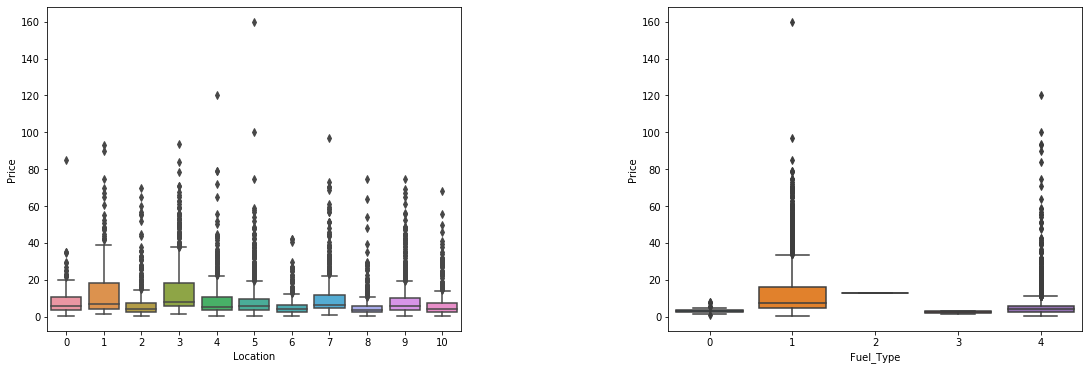

In [180]:
plt.subplots_adjust(left=0.125,bottom=0.1,right=3,top=1,wspace=0.5,hspace=0.2)
plt.subplot(131)
sns.boxplot("Location","Price",data=cars_data)
plt.subplot(132)
sns.boxplot("Fuel_Type","Price",data=cars_data)

In [181]:
cars_data.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

Text(0.5, 1.0, 'Car Location Vs Car Price')

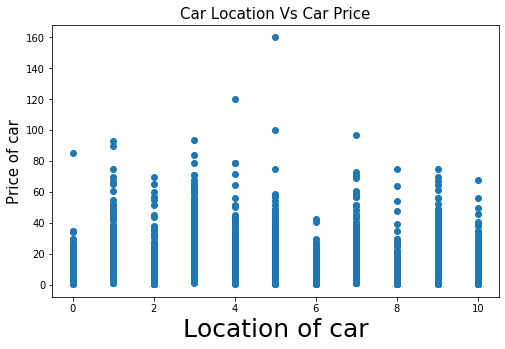

In [182]:
plt.scatter("Location","Price",data=cars_data)
plt.xlabel("Location of car",fontsize=25)
plt.ylabel("Price of car",fontsize=15)
plt.title("Car Location Vs Car Price",fontsize=15)

Text(0.5, 1.0, 'Yea Vs Price')

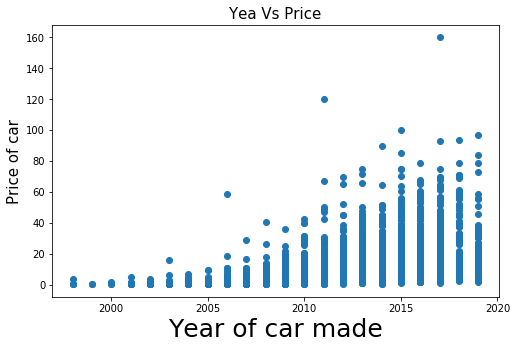

In [183]:
plt.scatter("Year","Price",data=cars_data)
plt.xlabel("Year of car made",fontsize=25)
plt.ylabel("Price of car",fontsize=15)
plt.title("Yea Vs Price",fontsize=15)

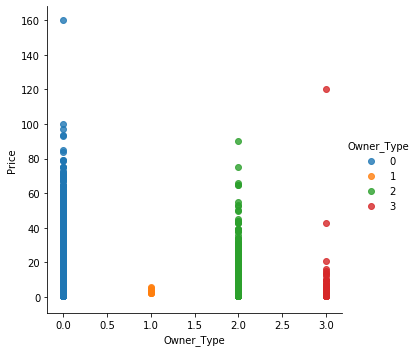

In [184]:
sns.lmplot("Owner_Type","Price",hue="Owner_Type",data=cars_data)

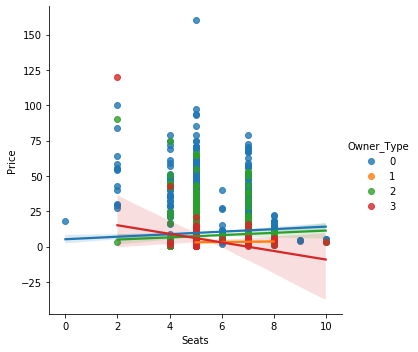

In [185]:
sns.lmplot("Seats","Price",hue="Owner_Type",data=cars_data)

In [186]:
Q1=cars_data.quantile(0.25)
Q3=cars_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Location                  5.00
Year                      5.00
Kilometeres_Driven    39000.00
Fuel_Type                 3.00
Transmission              1.00
Owner_Type                0.00
Mileage                   5.93
Engine                  771.00
Power                    60.03
Seats                     0.00
Price                     6.45
dtype: float64


Text(0, 0.5, 'Power of car')

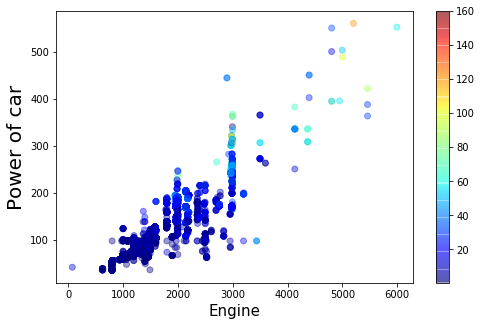

In [187]:
plt.scatter(cars_data["Engine"],cars_data["Power"],c=cars_data["Price"],cmap="jet",alpha=0.4)
plt.colorbar()
plt.xlabel("Engine",fontsize=15)
plt.ylabel("Power of car",fontsize=20)

Text(0, 0.5, 'Price of car')

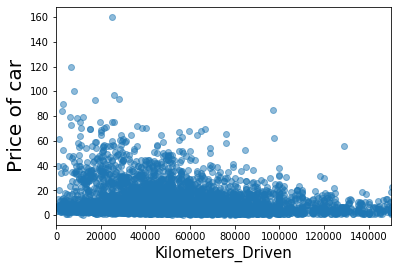

In [188]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(cars_data.iloc[:,3].values,cars_data["Price"].values,alpha=0.5)
plt.xlim(0,15e4)
plt.xlabel("Kilometers_Driven",fontsize=15)
plt.ylabel("Price of car",fontsize=20)

Text(0, 0.5, 'Price of car')

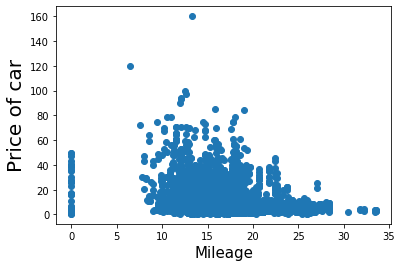

In [189]:
#plt.rcParams["figure.figsize"]=(6,3)
plt.scatter(cars_data["Mileage"],cars_data["Price"])
plt.xlabel("Mileage",fontsize=15)
plt.ylabel("Price of car",fontsize=20)

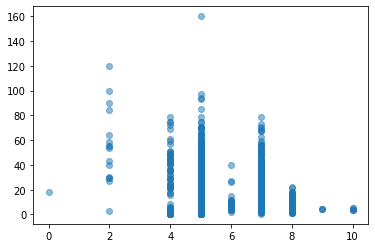

In [190]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(cars_data.iloc[:,10].values,cars_data["Price"].values,alpha=0.5)
#plt.xlim(0,15e4)

Text(0, 0.5, 'Price of cars')

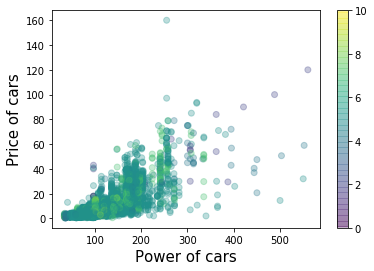

In [191]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(cars_data["Power"].values,cars_data["Price"].values,c=cars_data["Seats"],alpha=0.3)
plt.colorbar()
plt.xlabel("Power of cars",fontsize=15)
plt.ylabel("Price of cars",fontsize=15)

Text(0, 0.5, 'Price')

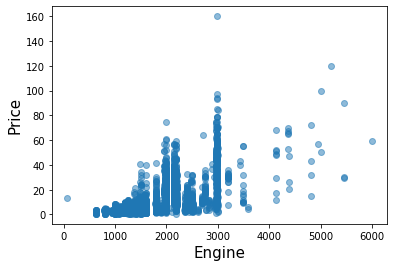

In [192]:
plt.scatter("Engine","Price",data=cars_data,alpha=0.5)
plt.xlabel("Engine",fontsize=15)
plt.ylabel("Price",fontsize=15)

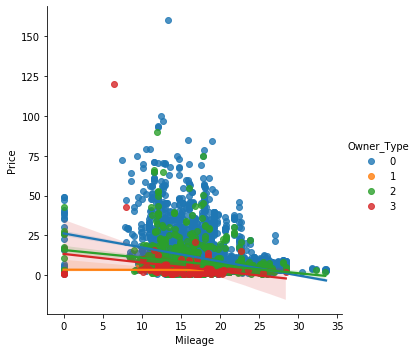

In [193]:
sns.lmplot("Mileage","Price",hue="Owner_Type",data=cars_data)

In [194]:
Q2=cars_data['Transmission'].quantile(0.20)
Q3=cars_data['Transmission'].quantile(0.80)

In [195]:
cars_data['Transmission']=np.where(cars_data['Transmission'] <Q2 ,Q2,cars_data['Transmission'])
cars_data['Transmission']=np.where(cars_data['Transmission'] >Q3 ,Q3,cars_data['Transmission'])
print(cars_data['Transmission'].skew())

-0.949306194815939


In [196]:
print(cars_data['Kilometeres_Driven'].quantile(0.1))
print(cars_data['Kilometeres_Driven'].quantile(0.9))

20000.0
96893.60000000003


In [197]:
cars_data['Kilometeres_Driven']=np.where(cars_data['Kilometeres_Driven'] <20000.0 ,20000.0,cars_data['Kilometeres_Driven'])
cars_data['Kilometeres_Driven']=np.where(cars_data['Kilometeres_Driven'] >96893.6 ,96893.6,cars_data['Kilometeres_Driven'])
print(cars_data['Kilometeres_Driven'].skew())

0.23737756146236266


In [198]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Brand,Model,Version
0,Maruti Wagon R LXI CNG,9,2010,72000.0,0,1.0,0,26.60,998.0,58.16,5.0,1.75,Maruti,maruti,wagonr,lxicng
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000.0,1,1.0,0,19.67,1582.0,126.20,5.0,12.50,Hyundai,hyundai,creta1.6,crdisxoption
2,Honda Jazz V,2,2011,46000.0,4,1.0,0,18.20,1199.0,88.70,5.0,4.50,Honda,honda,jazzv,
3,Maruti Ertiga VDI,2,2012,87000.0,1,1.0,0,20.77,1248.0,88.76,7.0,6.00,Maruti,maruti,ertigavdi,
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670.0,1,0.0,2,15.20,1968.0,140.80,5.0,17.74,Audi,audi,a4new,2.0tdimultitronic


In [199]:
cars_data.Brand = le.fit_transform(cars_data.Brand)
cars_data.Model = le.fit_transform(cars_data.Model)
cars_data.Version = le.fit_transform(cars_data.Version)
cars_data.Name = le.fit_transform(cars_data.Name)
cars_data.Company = le.fit_transform(cars_data.Company)
cars_data.dtypes

Name                    int32
Location                int32
Year                    int64
Kilometeres_Driven    float64
Fuel_Type               int32
Transmission          float64
Owner_Type              int32
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Company                 int32
Brand                   int32
Model                   int32
Version                 int32
dtype: object

In [200]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Brand,Model,Version
0,1200,9,2010,72000.0,0,1.0,0,26.60,998.0,58.16,5.0,1.75,18,17,611,765
1,512,10,2015,41000.0,1,1.0,0,19.67,1582.0,126.20,5.0,12.50,10,10,161,477
2,486,2,2011,46000.0,4,1.0,0,18.20,1199.0,88.70,5.0,4.50,9,9,334,0
3,1059,2,2012,87000.0,1,1.0,0,20.77,1248.0,88.76,7.0,6.00,18,17,222,0
4,23,3,2013,40670.0,1,0.0,2,15.20,1968.0,140.80,5.0,17.74,1,1,19,160


In [201]:
print("name:",cars_data['Name'].skew())
print("Brand:",cars_data['Brand'].skew())
print("Version:",cars_data['Version'].skew())
print("Model:",cars_data['Model'].skew())

name: 0.11313951380557141
Brand: 0.1756971683450809
Version: 0.015190501964969409
Model: 0.08294425616271786


In [202]:
cars_data['Owner_Type'].value_counts()

0    4928
2     968
3     113
1       9
Name: Owner_Type, dtype: int64

In [203]:
cars_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometeres_Driven    0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
Company               0
Brand                 0
Model                 0
Version               0
dtype: int64

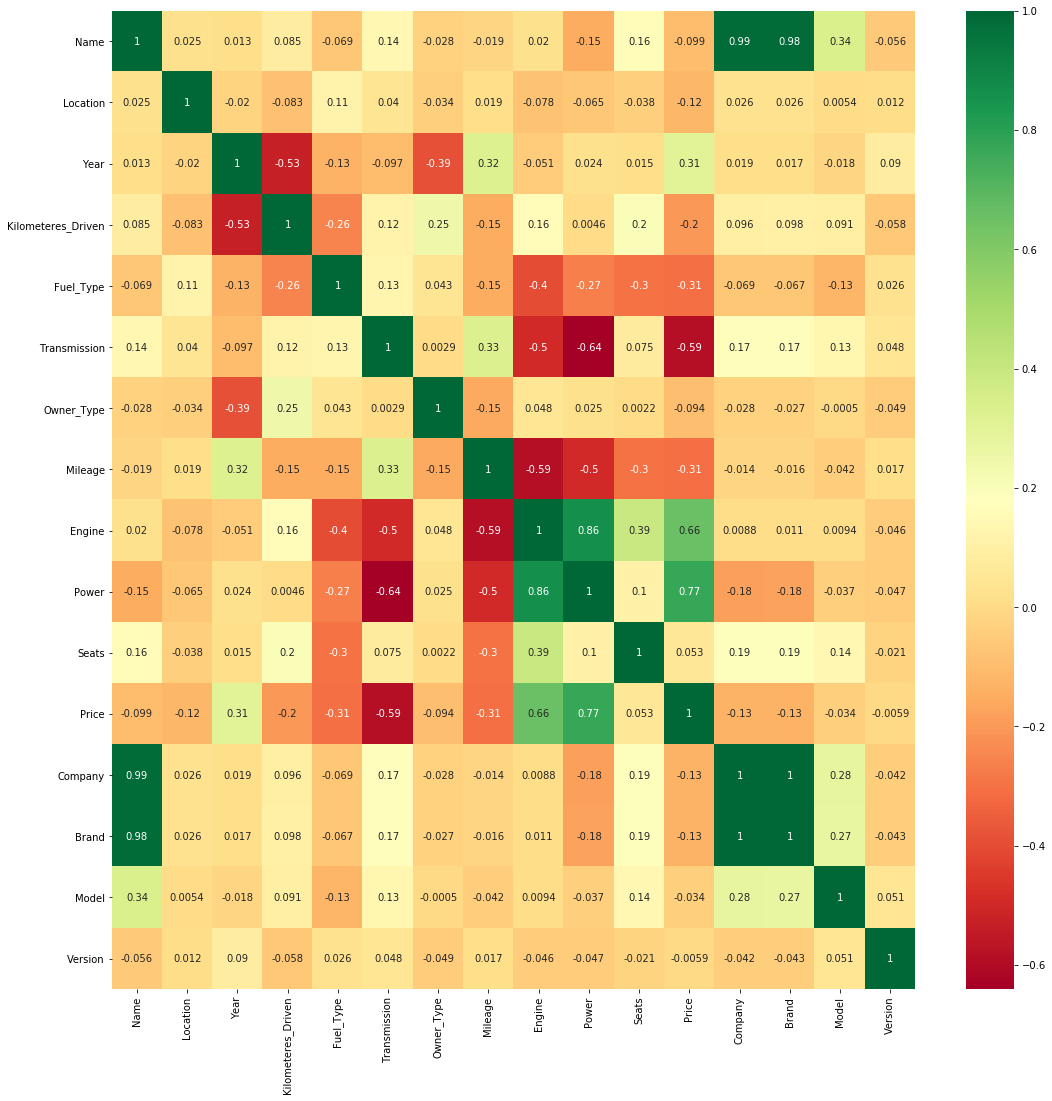

In [204]:
plt.figure(figsize=(18,18))
sns.heatmap(cars_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [205]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Brand,Model,Version
0,1200,9,2010,72000.0,0,1.0,0,26.60,998.0,58.16,5.0,1.75,18,17,611,765
1,512,10,2015,41000.0,1,1.0,0,19.67,1582.0,126.20,5.0,12.50,10,10,161,477
2,486,2,2011,46000.0,4,1.0,0,18.20,1199.0,88.70,5.0,4.50,9,9,334,0
3,1059,2,2012,87000.0,1,1.0,0,20.77,1248.0,88.76,7.0,6.00,18,17,222,0
4,23,3,2013,40670.0,1,0.0,2,15.20,1968.0,140.80,5.0,17.74,1,1,19,160


In [206]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6018 non-null   int32  
 1   Location            6018 non-null   int32  
 2   Year                6018 non-null   int64  
 3   Kilometeres_Driven  6018 non-null   float64
 4   Fuel_Type           6018 non-null   int32  
 5   Transmission        6018 non-null   float64
 6   Owner_Type          6018 non-null   int32  
 7   Mileage             6018 non-null   float64
 8   Engine              6018 non-null   float64
 9   Power               6018 non-null   float64
 10  Seats               6018 non-null   float64
 11  Price               6018 non-null   float64
 12  Company             6018 non-null   int32  
 13  Brand               6018 non-null   int32  
 14  Model               6018 non-null   int32  
 15  Version             6018 non-null   int32  
dtypes: flo

## Rescaling Of Data

In [207]:
#from sklearn import preprocessing
#print(cars_data.shape)
#x=cars_data
#normalized_x=preprocessing.normalize(x)

In [208]:
#cars_data=pd.DataFrame(normalized_x)
#cars_data.head()

In [209]:
#cars_data=cars_data.rename(columns={0:"Name",1:"Location",2:"Year",3:"Kilometeres_Driven",4:"Fuel_Type",5:"Transmission",
 #                                  6:"Owner_Type",7:"Mileage",8:"Engine",9:"Power",10:"Seats",11:"Price",12:"Company",
  #                                 13:"Brand",14:"Model",15:"Version"})
#cars_data.head()

In [210]:
cars_data.columns

Index(['Name', 'Location', 'Year', 'Kilometeres_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company', 'Brand', 'Model', 'Version'],
      dtype='object')

## Machine_Learning starting 

## Dividing Data Set Into Train Data and Test Data

In [211]:
x=features=cars_data[['Name', 'Location', 'Year', 'Kilometeres_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Company', 'Brand', 'Model', 'Version']].values
y=cars_data["Price"].values

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4,random_state=0)
Linear_Regression_Model=LinearRegression()

In [213]:
Linear_Regression_Model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
Y_Prediction=Linear_Regression_Model.predict(X_test)
Y_Prediction

array([-3.05624839, 19.06866143, -0.83885329, ...,  3.12358904,
        2.40005818, 11.65155497])

In [215]:
print("%.2f"%Linear_Regression_Model.score(X_test,Y_test))

0.70


In [216]:
cars_data.drop(columns=['Company', 'Brand', 'Model', 'Version'],inplace=True)

In [217]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000.0,0,1.0,0,26.60,998.0,58.16,5.0,1.75
1,512,10,2015,41000.0,1,1.0,0,19.67,1582.0,126.20,5.0,12.50
2,486,2,2011,46000.0,4,1.0,0,18.20,1199.0,88.70,5.0,4.50
3,1059,2,2012,87000.0,1,1.0,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670.0,1,0.0,2,15.20,1968.0,140.80,5.0,17.74


In [218]:
x=features=cars_data[['Name', 'Location', 'Year', 'Kilometeres_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']].values
y=cars_data["Price"].values

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4,random_state=0)
Linear_Regression_Model=LinearRegression()

In [220]:
Linear_Regression_Model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
Y_Prediction=Linear_Regression_Model.predict(X_test)
Y_Prediction

array([-4.10110898, 19.74402689,  0.70188502, ...,  1.56896026,
        1.24331794, 11.62819772])

In [222]:
print("%.2f"%Linear_Regression_Model.score(X_test,Y_test))

0.70


In [223]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [224]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_Prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_Prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_Prediction)))

Mean Absolute Error: 3.796938050825832
Mean Squared Error: 38.365174859899696
Root Mean Squared Error: 6.193962775146432


In [225]:
Y_Prediction

array([-4.10110898, 19.74402689,  0.70188502, ...,  1.56896026,
        1.24331794, 11.62819772])

In [226]:
n=r2_score(Y_test,Y_Prediction)
n

0.6954851156111169

In [227]:
import statsmodels.api as sm
x1=sm.add_constant(x)
model=sm.OLS(y,x1)

In [228]:
results=model.fit()
results.params

array([-1.57726547e+03,  1.34410953e-04, -2.26928135e-01,  7.89460140e-01,
       -5.49945601e-05, -1.08649077e+00, -2.43856483e+00, -2.13367852e-02,
       -2.21111483e-01,  1.21575027e-03,  1.18683984e-01, -1.06147897e+00])

In [229]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1311.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:44:00   Log-Likelihood:                -19376.
No. Observations:                6018   AIC:                         3.878e+04
Df Residuals:                    6006   BIC:                         3.886e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1577.2655     66.112    -23.857      0.0

In [230]:
print(X_train.shape)
X_train=X_train.T
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
xTest=X_test.T
print(X_test.shape)
print(Y_test.shape)

(3610, 11)
(11, 3610)
(3610,)
(2408, 11)
(2408, 11)
(2408,)


## Gradient Descent

In [231]:
def gradient_decent(x,y,cost_list):
    m_curr=b_curr=0
    iterations=10
    n=len(x)
    learning_rate=0.01
    cost_list=[]
    cost_list.append(1e10)
    for i in range(iterations):
        y_predicted=m_curr*x+b_curr
        cost=(1/n)* sum([val**2 for val in (y-y_predicted)])
        md=-(2/n)*sum(x*[y-y_predicted])
        bd=-(2/n)*sum([y-y_predicted])
        cost_list.append(cost)
        m_curr=m_curr - learning_rate * md
        b_curr=b_curr - learning_rate * bd
        print("## m{} ,b {} ,cost {} ## ".format(m_curr,b_curr,cost))
        print(i)
        print('#########################################################')
    return cost_list

In [232]:
cost_list=[]
cost_list=gradient_decent(X_train,Y_train,cost_list)

## m[[3.28690909e+00 2.40545455e+00 4.93363636e+00 ... 1.01022727e+01
  2.64500000e+00 1.40522727e+01]
 [4.18181818e-03 5.09090909e-02 6.62727273e-01 ... 9.09090909e-02
  3.00000000e-02 7.36363636e-02]
 [4.19854545e+00 1.28163636e+01 1.48230000e+02 ... 2.28636364e+01
  1.00750000e+01 2.47540909e+01]
 ...
 [2.91890909e+00 9.53272727e+00 2.13103636e+02 ... 2.47613636e+01
  4.07000000e+00 1.46904545e+01]
 [1.11863636e-01 6.27454545e-01 3.26945455e+01 ... 1.36363636e+00
  2.76000000e-01 1.02035455e+00]
 [1.04545455e-02 3.18181818e-02 2.94545455e-01 ... 9.09090909e-02
  2.50000000e-02 6.13636364e-02]] ,b [[0.00209091 0.00636364 0.07363636 ... 0.01136364 0.005      0.01227273]
 [0.00209091 0.00636364 0.07363636 ... 0.01136364 0.005      0.01227273]
 [0.00209091 0.00636364 0.07363636 ... 0.01136364 0.005      0.01227273]
 ...
 [0.00209091 0.00636364 0.07363636 ... 0.01136364 0.005      0.01227273]
 [0.00209091 0.00636364 0.07363636 ... 0.01136364 0.005      0.01227273]
 [0.00209091 0.00636364

In [233]:
er = []
g = 0
for i in range(len(Y_test)):
    print( "actual=", Y_test[i], " observed=", Y_Prediction[i])
    n = (Y_test[i] - Y_Prediction[i]) **2
    er.append(n)
    g = g + n
    
n = 0
for i in range(len(er)):
   n = n + er[i]

actual= 1.85  observed= -4.101108984827761
actual= 21.42  observed= 19.744026890661416
actual= 2.35  observed= 0.7018850204146929
actual= 2.35  observed= 2.211978513413669
actual= 54.0  observed= 50.0666459546585
actual= 1.75  observed= -3.5857956470308636
actual= 3.65  observed= 5.434946573661136
actual= 11.5  observed= 19.1679168078947
actual= 6.5  observed= 11.542575993294577
actual= 11.05  observed= 14.967722317014022
actual= 16.95  observed= 19.238866830135294
actual= 2.15  observed= 1.0266080670739939
actual= 27.0  observed= 25.638473395850724
actual= 3.45  observed= 1.7097473864987478
actual= 5.4  observed= 15.466547246302525
actual= 3.45  observed= 1.9644055128442233
actual= 2.1  observed= -0.9919370946611252
actual= 5.95  observed= 13.382638734320608
actual= 7.47  observed= 7.192242249796664
actual= 3.8  observed= 5.715106406409632
actual= 4.95  observed= 13.073515971711686
actual= 2.5  observed= 0.7232489102048021
actual= 47.5  observed= 30.57177678389189
actual= 41.5  observ

actual= 5.25  observed= 3.4257429577960465
actual= 5.85  observed= 10.863368662785206
actual= 3.65  observed= 2.869321114415243
actual= 3.1  observed= 4.510314031067992
actual= 15.0  observed= 16.38803004843794
actual= 2.0  observed= 1.935617319506946
actual= 7.0  observed= 11.246552990056898
actual= 2.9  observed= 2.450914862112313
actual= 4.25  observed= 6.327362795939052
actual= 6.27  observed= 8.647821954423307
actual= 39.51  observed= 26.36581024192401
actual= 7.4  observed= 11.00887913929978
actual= 2.3  observed= 3.505002690661513
actual= 2.65  observed= 1.215233375759908
actual= 5.4  observed= 6.047799863831187
actual= 7.85  observed= 2.2061959665779796
actual= 6.0  observed= 8.387439702823485
actual= 9.66  observed= 15.255940039265397
actual= 4.65  observed= 18.211199424935103
actual= 2.25  observed= 1.7089343060742976
actual= 5.6  observed= 3.5931132798700673
actual= 7.8  observed= 4.140017667476059
actual= 22.0  observed= 26.46412639398568
actual= 7.9  observed= 6.7135387702

actual= 4.75  observed= 5.745757921640234
actual= 7.55  observed= 11.321213054136933
actual= 1.2  observed= -5.442427402115072
actual= 5.35  observed= 2.7069891538806132
actual= 3.45  observed= 4.996554653973362
actual= 8.62  observed= 9.213555557287236
actual= 9.45  observed= 13.04150267512864
actual= 3.15  observed= -1.081400278603951
actual= 19.0  observed= 19.34723321876868
actual= 2.85  observed= 6.141532390144903
actual= 12.75  observed= 18.972683289948236
actual= 6.0  observed= 2.676480326077126
actual= 6.75  observed= 10.277594127529483
actual= 23.5  observed= 18.62729037461304
actual= 2.5  observed= -3.673508511068121
actual= 4.8  observed= 9.737036095455096
actual= 3.48  observed= 4.38430192839769
actual= 6.25  observed= 7.690490593915456
actual= 11.0  observed= 19.377501101793314
actual= 15.5  observed= 9.144651868474284
actual= 19.92  observed= 24.895556461886827
actual= 52.0  observed= 35.12508564965924
actual= 5.75  observed= 9.388113088284172
actual= 28.0  observed= 26.0

actual= 6.75  observed= 12.439750338137856
actual= 19.92  observed= 20.011709517318423
actual= 3.22  observed= -1.0114166430637397
actual= 3.95  observed= 4.236101904346697
actual= 21.0  observed= 23.89166982158895
actual= 2.25  observed= -2.7002724002456944
actual= 37.0  observed= 54.68865636517671
actual= 4.25  observed= 1.6940052772886247
actual= 7.75  observed= 16.787802203838055
actual= 3.85  observed= 1.0330460044744996
actual= 4.9  observed= 5.604722637789564
actual= 7.51  observed= 11.288351604806167
actual= 5.84  observed= 7.591377658822239
actual= 3.15  observed= 2.4326998546330287
actual= 10.5  observed= 13.707415348759014
actual= 12.81  observed= 15.535866046253432
actual= 3.55  observed= 9.689268078161149
actual= 6.75  observed= 10.188672944128939
actual= 30.0  observed= 24.83701054617177
actual= 4.25  observed= 5.541189109771722
actual= 4.6  observed= 6.2653612532192255
actual= 1.4  observed= -2.9838136100520387
actual= 10.49  observed= 14.761526788196534
actual= 6.0  obs

actual= 6.93  observed= 5.627966008997873
actual= 1.7  observed= 2.725032318198828
actual= 2.5  observed= -0.9808085717404538
actual= 18.75  observed= 20.930757528063623
actual= 6.2  observed= 8.700054931968907
actual= 2.05  observed= -3.2952958797141036
actual= 3.37  observed= 4.342299107104964
actual= 3.7  observed= 1.3296815338526358
actual= 29.0  observed= 29.17515813138789
actual= 8.0  observed= 8.801459014229977
actual= 4.9  observed= 4.107765395170645
actual= 16.5  observed= 16.121841290759676
actual= 10.85  observed= 17.197738009407885
actual= 5.8  observed= 7.623405169484386
actual= 4.0  observed= 7.331423505511111
actual= 2.65  observed= -0.3915237593503207
actual= 39.5  observed= 31.539474631676285
actual= 7.5  observed= 12.185894012706513
actual= 3.21  observed= 4.7780481618794965
actual= 3.9  observed= 5.6553182908482995
actual= 7.58  observed= 9.198836696577473
actual= 7.56  observed= 9.038696761723713
actual= 7.83  observed= 14.914764259253843
actual= 3.95  observed= 3.3

actual= 3.57  observed= 4.3709398857129145
actual= 4.57  observed= 4.1584985408690045
actual= 50.29  observed= 37.70442781591146
actual= 13.0  observed= 20.835377371081677
actual= 28.0  observed= 30.417151302931188
actual= 2.39  observed= 3.765996226672314
actual= 4.75  observed= 6.444657254915228
actual= 4.5  observed= 0.7636400316637264
actual= 3.0  observed= -0.07496854840474043
actual= 7.08  observed= 10.392684579091565
actual= 10.36  observed= 17.31343816270055
actual= 1.95  observed= -2.183366565559254
actual= 4.57  observed= 4.416220670565735
actual= 11.64  observed= 13.316141301963171
actual= 6.4  observed= 9.200210444668755
actual= 39.84  observed= 26.406525137533663
actual= 4.25  observed= 9.679918387216276
actual= 3.33  observed= 4.553363265556527
actual= 1.65  observed= -1.181850678769024
actual= 2.61  observed= -1.4129792514249857
actual= 3.4  observed= 8.812202750418919
actual= 25.0  observed= 22.245441554651734
actual= 2.5  observed= 4.092306491001409
actual= 4.0  observ

actual= 6.0  observed= 6.468182980912161
actual= 2.8  observed= 2.9616624916404817
actual= 16.5  observed= 17.559145553598455
actual= 3.25  observed= 1.1415410436343336
actual= 5.43  observed= 7.529845412381974
actual= 2.8  observed= 1.9327994369027692
actual= 7.0  observed= 10.488056387810502
actual= 2.1  observed= -1.9531469281198497
actual= 3.5  observed= 2.804964142703966
actual= 9.0  observed= 15.945543544826023
actual= 5.25  observed= 11.969829240522586
actual= 2.6  observed= -0.7948237064176737
actual= 9.1  observed= 13.89526514523186
actual= 1.75  observed= -2.113946283949417
actual= 11.49  observed= 6.500569790293412
actual= 7.8  observed= 7.600197157383491
actual= 8.4  observed= 13.4662465058625
actual= 7.8  observed= 11.232489714855092
actual= 3.8  observed= 4.827343347330498
actual= 6.34  observed= 5.293226583280557
actual= 5.5  observed= 7.630962853421806
actual= 10.97  observed= 17.902614703003792
actual= 4.52  observed= 6.138171894620655
actual= 2.75  observed= 3.9294254

actual= 11.03  observed= 22.192627688604034
actual= 12.5  observed= 14.559175704580639
actual= 1.49  observed= -4.394598255935989
actual= 12.45  observed= 15.422406356785814
actual= 5.84  observed= 7.990707061550893
actual= 1.36  observed= -1.4326269586251783
actual= 4.61  observed= 4.098061400500001
actual= 2.6  observed= 3.6138411657670986
actual= 4.5  observed= 4.339155758427296
actual= 5.71  observed= 6.440610336647524
actual= 12.07  observed= 28.197187418765225
actual= 29.0  observed= 24.227879986777225
actual= 5.49  observed= 3.4422145790717877
actual= 2.38  observed= 4.987817023622256
actual= 1.8  observed= -2.727810979985179
actual= 14.79  observed= 18.040711899783673
actual= 19.5  observed= 20.618658267796945
actual= 3.77  observed= 1.6014691315956497
actual= 6.5  observed= 6.707487329967762
actual= 4.4  observed= 5.04131651253374
actual= 5.5  observed= 7.767686247967504
actual= 9.5  observed= 7.6211801601546085
actual= 1.8  observed= -3.5961176961823185
actual= 32.73  observe

actual= 18.25  observed= 17.59932871709998
actual= 6.25  observed= 11.487763938219587
actual= 3.2  observed= 4.838445191966457
actual= 10.9  observed= 10.647134253216336
actual= 12.3  observed= 17.083192657916697
actual= 20.72  observed= 54.50938106973058
actual= 2.85  observed= 4.266535233305149
actual= 5.21  observed= 4.607009190149483
actual= 2.6  observed= 0.357421563436219
actual= 32.95  observed= 33.789644222297966
actual= 4.5  observed= 6.158999924834006
actual= 4.6  observed= 4.674951201255681
actual= 30.0  observed= 27.067511174454012
actual= 1.15  observed= -1.389262461682847
actual= 6.85  observed= 7.56433243968695
actual= 1.2  observed= -1.3540729746471243
actual= 5.44  observed= 6.29092589206266
actual= 6.42  observed= 8.914460928732979
actual= 7.0  observed= 18.133672724706003
actual= 2.21  observed= -0.9826451054680092
actual= 28.03  observed= 24.206383858771233
actual= 3.99  observed= 2.7765986072977284
actual= 6.25  observed= 4.094924251649218
actual= 14.45  observed= 

actual= 10.31  observed= 11.628197722697678


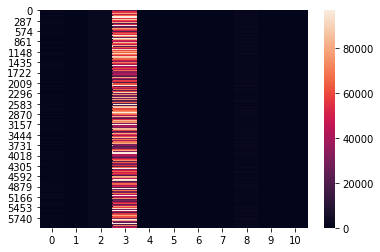

In [234]:
sns.heatmap(x)  

In [236]:
corr=cars_data.corr()
corr

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.025079,0.013237,0.085037,-0.069202,0.137766,-0.027865,-0.018879,0.020365,-0.148210,0.157058,-0.098652
Location,0.025079,1.000000,-0.019895,-0.083300,0.114885,0.039866,-0.033988,0.018680,-0.078178,-0.064997,-0.037682,-0.115861
Year,0.013237,-0.019895,1.000000,-0.525778,-0.129380,-0.096796,-0.386121,0.321660,-0.050537,0.024170,0.015269,0.305065
Kilometeres_Driven,0.085037,-0.083300,-0.525778,1.000000,-0.255801,0.115395,0.246216,-0.148679,0.160188,0.004601,0.202613,-0.200032
Fuel_Type,-0.069202,0.114885,-0.129380,-0.255801,1.000000,0.125015,0.042951,-0.152207,-0.401641,-0.265754,-0.299381,-0.305106
Transmission,0.137766,0.039866,-0.096796,0.115395,0.125015,1.000000,0.002880,0.333063,-0.498913,-0.640747,0.074764,-0.586043
Owner_Type,-0.027865,-0.033988,-0.386121,0.246216,0.042951,0.002880,1.000000,-0.154225,0.048045,0.024608,0.002192,-0.094371
Mileage,-0.018879,0.018680,0.321660,-0.148679,-0.152207,0.333063,-0.154225,1.000000,-0.586478,-0.497322,-0.299663,-0.306836
Engine,0.020365,-0.078178,-0.050537,0.160188,-0.401641,-0.498913,0.048045,-0.586478,1.000000,0.860306,0.393674,0.657091
Power,-0.148210,-0.064997,0.024170,0.004601,-0.265754,-0.640747,0.024608,-0.497322,0.860306,1.000000,0.102788,0.769586


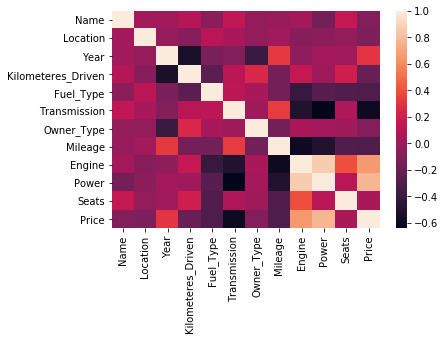

In [237]:
sns.heatmap(corr)

In [238]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [242]:
x2=features=cars_data[['Name', 'Location', 'Year', 'Kilometeres_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']].values
y1 = cars_data.Price

In [243]:
lin_reg=LinearRegression()
MSE=cross_val_score(lin_reg,x2,y1,scoring='neg_mean_squared_error',cv=25)
mean_MSE=np.mean(MSE)
print(mean_MSE)
print(lin_reg.score)

-36.93008403166587
<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


## Ridge Regression¶

In [244]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [245]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x2, y1)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 11)

Text(0, 0.5, 'weights')

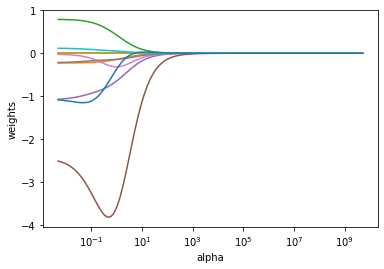

In [246]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [247]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [248]:
print(X_train.shape)
print(y_train.shape)

(3009, 11)
(3009,)


In [249]:
ridge2 = Ridge(alpha = 10, normalize = True)
ridge2.fit(X_train, y_train)            
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_)) 
print(mean_squared_error(y_test, pred2))

0    -0.000180
1    -0.034354
2     0.092519
3    -0.000008
4    -0.180083
5    -1.166518
6    -0.104020
7    -0.055707
8     0.000989
9     0.013012
10    0.015893
dtype: float64
87.4949893637663


In [250]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)          
print(pd.Series(ridge3.coef_)) 
print(mean_squared_error(y_test, pred3))

0    -2.314451e-13
1    -4.182118e-11
2     1.061947e-10
3    -8.729743e-15
4    -2.280004e-10
5    -1.489824e-09
6    -1.265690e-10
7    -7.623390e-11
8     1.266092e-12
9     1.624973e-11
10    5.941428e-11
dtype: float64
116.8328599580744


In [251]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)            
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_)) 
print(mean_squared_error(y_test, pred2))

0     0.000068
1    -0.225265
2     0.777777
3    -0.000057
4    -1.034610
5    -2.542209
6     0.098288
7    -0.191922
8     0.001602
9     0.118992
10   -0.957234
dtype: float64
35.36462051505995


In [252]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.006609705742330144

In [253]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

35.37109749379274

In [254]:
print(ridgecv.score)
print(' SCORE: %.2f' % r2_score(y_test,ridge4.predict(X_test)))

<bound method RegressorMixin.score of RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)>
 SCORE: 0.70


In [255]:
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

In [256]:
knn=KNeighborsRegressor(n_neighbors=11)
y_pred= cross_val_predict(knn ,x,y,cv=5)
y_pred

array([ 2.95454545,  5.13454545,  6.41181818, ..., 22.80909091,
        5.30272727,  4.64      ])

In [257]:
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

53.16115854681136
0.5735411629761424


In [258]:
error =[]
for k in range(1,26):
    knn=KNeighborsRegressor(n_neighbors=k)
    y_pred= cross_val_predict(knn ,x,y,cv=11)
    error.append(mean_squared_error(y,y_pred))

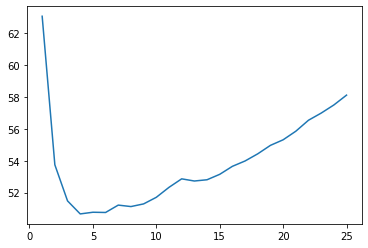

In [259]:
plt.plot(range(1,26),error)

In [260]:
pipeline=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=11))
y_pred= cross_val_predict(pipeline,x,y,cv=5)
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

23.051056536725913
0.8150844144194642


In [261]:
error =[]
for k in range(1,26):
    pipeline=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    y_pred= cross_val_predict(pipeline,x,y,cv=5)
    error.append(mean_squared_error(y,y_pred))

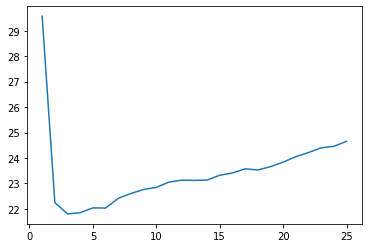

In [262]:
plt.plot(range(1,26),error)

In [263]:
from sklearn.model_selection import KFold

In [264]:
cv = KFold(n_splits=5 , random_state=0, shuffle = False)

C:\Users\PRASHANTH\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [265]:
pipeline=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=11))
y_pred= cross_val_predict(pipeline,x,y,cv=5)
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

23.051056536725913
0.8150844144194642


In [267]:
print(x,y)

[[1.200e+03 9.000e+00 2.010e+03 ... 9.980e+02 5.816e+01 5.000e+00]
 [5.120e+02 1.000e+01 2.015e+03 ... 1.582e+03 1.262e+02 5.000e+00]
 [4.860e+02 2.000e+00 2.011e+03 ... 1.199e+03 8.870e+01 5.000e+00]
 ...
 [9.320e+02 6.000e+00 2.012e+03 ... 2.498e+03 1.120e+02 8.000e+00]
 [1.207e+03 8.000e+00 2.013e+03 ... 9.980e+02 6.710e+01 5.000e+00]
 [1.650e+02 5.000e+00 2.011e+03 ... 9.360e+02 5.760e+01 5.000e+00]] [ 1.75 12.5   4.5  ...  2.9   2.65  2.5 ]


## Decision Tree

In [268]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(x, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [269]:
regressor.score(x,y)

0.9999916898491665

In [270]:
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(x,y)
print(model_mae)
print('Score : ',decisiontree_mae.score(x,y))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
Score :  0.9999916000937611


## Random Forest Regressor :

In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [272]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(x,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [273]:
model = RandomForestRegressor(random_state=0, n_estimators=100)
model.fit(x_training_set, y_training_set)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [274]:
importances = model.feature_importances_
importances

array([0.03985989, 0.01274824, 0.15894957, 0.03336764, 0.00327275,
       0.00954475, 0.00195854, 0.02250908, 0.04280484, 0.6664204 ,
       0.0085643 ])

In [276]:
indices = np.argsort(importances)[::-1]
indices
names=[cars_data.columns[i] for i in indices]

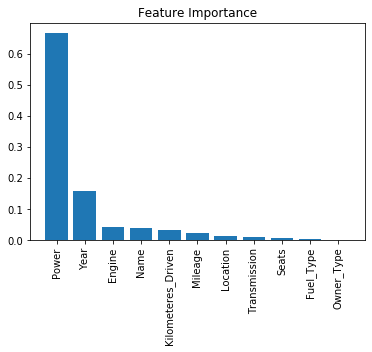

In [277]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

In [280]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)

print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(x_test_set)
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
print('score: %.2f' % r2_score(y_test_set, y_predicted))

coefficient of determination R^2 of the prediction.:  0.9869133065461648
Mean squared error: 29.24
score: 0.82


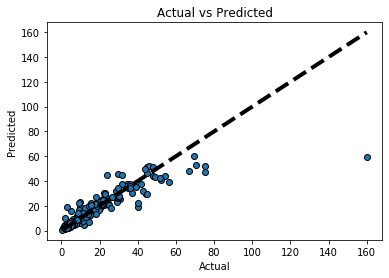

In [281]:
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

## K-Means :¶

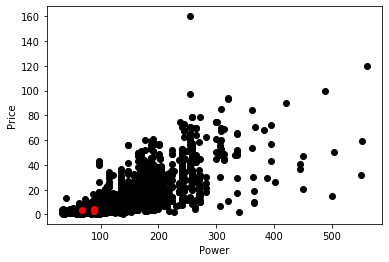

In [283]:
df=cars_data[['Power','Price']]
K=3
Centroids = (df.sample(n=K))
plt.scatter(df["Power"],df["Price"],c='black')
plt.scatter(Centroids["Power"],Centroids["Price"],c='red')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

In [284]:
diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Power"]-row_d["Power"])**2
            d2=(row_c["Price"]-row_d["Price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["Power","Price"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Power']-Centroids['Power']).sum()+(Centroids_new['Price']-Centroids['Price']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["Power","Price"]]

C:\Users\PRASHANTH\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PRASHANTH\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


50.91426135323904
24.946488703712195
18.742662291503354
7.913874068150301
1.3284344261260959
1.365062351793763
1.8318853071874965
1.461883606392754
0.8499928630361007
0.5288704491788119
1.3634995525234341
1.9059318660179105
0.8842631725745713
0.5882395833575318
0.33070597159656856
0.13525373560378906
0.04416961469474323
0.021997428692251297
0.0


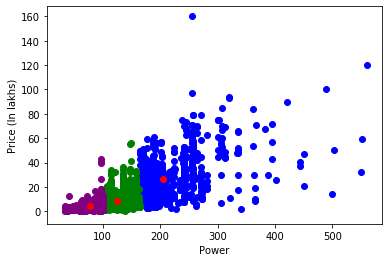

In [285]:
color=['blue','green','purple']
for k in range(K):
    data=df[df["Cluster"]==k+1]
    plt.scatter(data["Power"],data["Price"],c=color[k])
plt.scatter(Centroids["Power"],Centroids["Price"],c='red')
plt.xlabel('Power')
plt.ylabel('Price (In lakhs)')
plt.show()

In [286]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(scaled_data)
print(kmeans.inertia_)

9378.848554808628


Text(0, 0.5, 'Inertia')

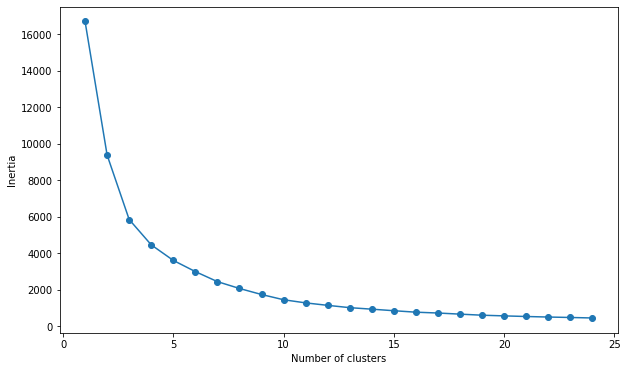

In [287]:
SSE = []
for cluster in range(1,25):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,25), 'SSE':SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [288]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
pred

array([0, 1, 1, ..., 0, 0, 0])

In [289]:
from sklearn.metrics import silhouette_score
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(data)
    predictions = model.predict(data)
    results[size] = silhouette_score(data, predictions)

best_size = max(results, key=results.get)
print(best_size)

9


## Support vector Regression :

In [290]:
from sklearn.svm import SVR

In [293]:
X1=cars_data.iloc[:,1:10].values
y1=cars_data.iloc[:,11].values

In [294]:
print(x1)

[[1.000e+00 1.200e+03 9.000e+00 ... 9.980e+02 5.816e+01 5.000e+00]
 [1.000e+00 5.120e+02 1.000e+01 ... 1.582e+03 1.262e+02 5.000e+00]
 [1.000e+00 4.860e+02 2.000e+00 ... 1.199e+03 8.870e+01 5.000e+00]
 ...
 [1.000e+00 9.320e+02 6.000e+00 ... 2.498e+03 1.120e+02 8.000e+00]
 [1.000e+00 1.207e+03 8.000e+00 ... 9.980e+02 6.710e+01 5.000e+00]
 [1.000e+00 1.650e+02 5.000e+00 ... 9.360e+02 5.760e+01 5.000e+00]]


In [295]:
sc_x=StandardScaler()
sc_y=StandardScaler()
X= sc_x.fit_transform(x1)
Y= sc_y.fit_transform(y1.reshape(-1,1))

In [296]:
regressor =SVR(kernel='rbf')
regressor.fit(X,Y)

C:\Users\PRASHANTH\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [297]:
y_pred = regressor.predict(X)
print(y_pred)
y_pred = sc_y.inverse_transform(y_pred) 
print(y_pred)

[-0.6226396  -0.00686866 -0.54129011 ... -0.47606617 -0.58290015
 -0.60209225]
[2.51847251 9.39355405 3.42673943 ... 4.15496463 2.96216347 2.74788372]


In [298]:
print('score of SVR : %.2f' % r2_score(y1, y_pred))

score of SVR : 0.89


In [300]:
cars_data.head()

,Name,Location,Year,Kilometeres_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000.0,0,1.0,0,26.60,998.0,58.16,5.0,1.75
1,512,10,2015,41000.0,1,1.0,0,19.67,1582.0,126.20,5.0,12.50
2,486,2,2011,46000.0,4,1.0,0,18.20,1199.0,88.70,5.0,4.50
3,1059,2,2012,87000.0,1,1.0,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670.0,1,0.0,2,15.20,1968.0,140.80,5.0,17.74


## Polynomial Regression:

In [301]:
from sklearn.preprocessing import PolynomialFeatures

In [302]:
pf=PolynomialFeatures(degree=2)
lo=LinearRegression();
ypred=cross_val_predict(lo,pf.fit_transform(x),y)

print("MSE: ",mean_squared_error(y,ypred))
print("R2: ",r2_score(y,ypred))

MSE:  19.459037123718236
R2:  0.8438995957155885
